# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1726692572984.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,09/17/2024,5634.58,5655.51,5670.81,5614.05
1,09/16/2024,5633.09,5615.21,5636.05,5604.53
2,09/13/2024,5626.02,5603.34,5636.27,5601.65
3,09/12/2024,5595.76,5557.48,5600.71,5535.50
4,09/11/2024,5554.13,5496.42,5560.41,5406.96
...,...,...,...,...,...
2522,09/24/2014,1998.30,1983.34,1999.79,1978.63
2523,09/23/2014,1982.77,1992.78,1995.41,1982.77
2524,09/22/2014,1994.29,2009.08,2009.08,1991.01
2525,09/19/2014,2010.40,2012.74,2019.26,2006.59


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2527.000000,2527.000000,2527.000000,2527.000000
mean,3238.494709,3228.992454,3246.367677,3210.376066
std,1015.300820,1034.275176,1040.078017,1028.470203
min,1829.080000,0.000000,0.000000,0.000000
25%,2349.130000,2350.030000,2357.570000,2338.250000
50%,2924.430000,2920.400000,2934.800000,2909.270000
75%,4135.740000,4132.105000,4157.270000,4109.235000
max,5667.200000,5655.510000,5670.810000,5639.020000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2516.000000,2516.000000,2516.000000,2516.000000
mean,3243.642778,3243.109670,3260.560859,3224.411892
std,1014.515786,1014.200164,1019.900738,1008.514763
min,1829.080000,1833.400000,1847.000000,1810.100000
25%,2357.127500,2355.525000,2365.685000,2344.675000
50%,2926.245000,2922.980000,2938.020000,2913.155000
75%,4136.330000,4132.992500,4159.327500,4110.585000
max,5667.200000,5655.510000,5670.810000,5639.020000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2526
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2516 non-null   object 
 1   Close/Last  2516 non-null   float64
 2   Open        2516 non-null   float64
 3   High        2516 non-null   float64
 4   Low         2516 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.9+ KB


In [5]:
df.shape

(2516, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

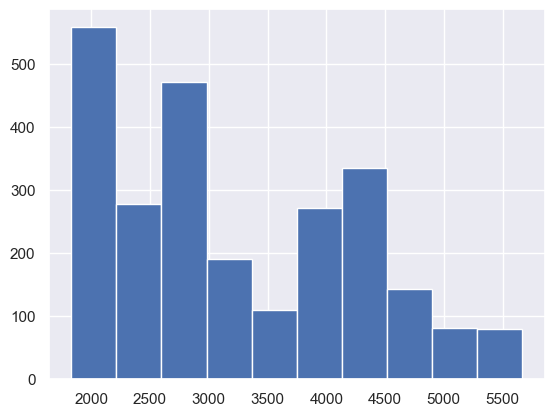

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

5634.58

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3243.642778219399

In [10]:
close_sd = df['Close/Last'].std()
close_sd

1014.5157858397886

In [11]:
sigma1 = close_mean + close_sd
sigma1

4258.1585640591875

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

5272.674349898976

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5779.932242818871

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2526
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2014-09-18 to 2024-09-17')

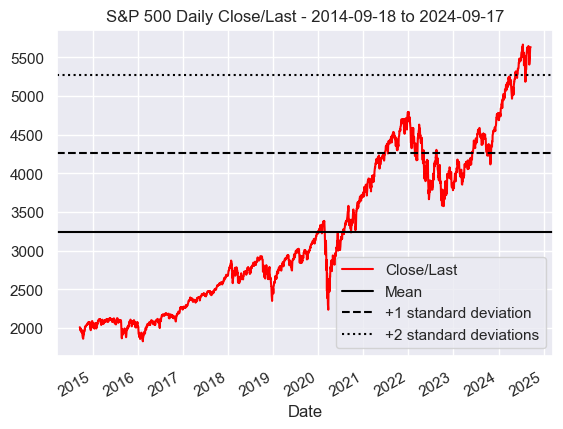

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2014-09-18 to 2024-09-17')

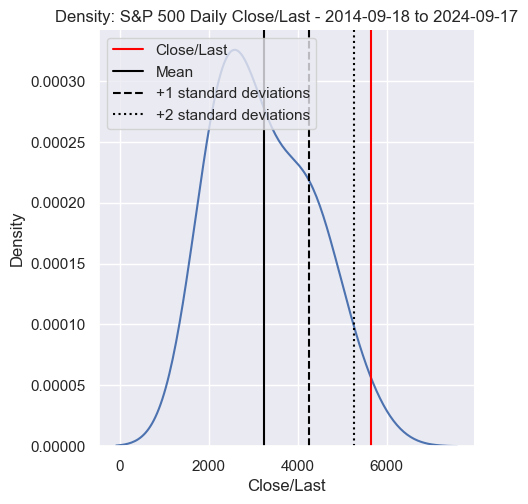

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_current, color=c, label='Close/Last')
plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.35672747053556

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results